In [277]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn import metrics

In [278]:
df = pd.read_csv('INFY.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,0.794921,0.796679,0.791015,0.796679,0.549483,204800.0
1996-01-02,0.794921,0.798828,0.793457,0.793457,0.547260,204800.0
1996-01-03,0.798828,0.798828,0.798828,0.798828,0.550965,102400.0
1996-01-04,0.791015,0.794921,0.791015,0.793554,0.547327,307200.0
1996-01-05,0.784179,0.784179,0.784179,0.784179,0.540861,51200.0
...,...,...,...,...,...,...
2021-10-12,1677.000000,1689.000000,1662.000000,1685.150024,1685.150024,7439300.0
2021-10-13,1695.949951,1713.650024,1680.050049,1709.199951,1709.199951,7104171.0
2021-10-14,1754.000000,1783.599976,1698.199951,1715.750000,1715.750000,19655776.0


In [279]:
df = df[-496:] # Considering only last 2 years of dataset
df = df.reset_index(drop=True)
df

,Open,High,Low,Close,Adj Close,Volume
0,630.000000,656.650024,615.099976,650.599976,628.261230,60516887.0
1,650.000000,653.200012,632.000000,635.349976,613.534851,25666433.0
2,647.000000,652.500000,636.000000,637.450012,615.562744,16549337.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,651.000000,653.750000,647.000000,650.650024,628.309509,16709764.0
...,...,...,...,...,...,...
491,1677.000000,1689.000000,1662.000000,1685.150024,1685.150024,7439300.0
492,1695.949951,1713.650024,1680.050049,1709.199951,1709.199951,7104171.0
493,1754.000000,1783.599976,1698.199951,1715.750000,1715.750000,19655776.0
494,1740.000000,1799.000000,1740.000000,1792.150024,1792.150024,13438109.0


In [280]:
print('Dataframe Shape: ', df. shape)
print('Null Value Present: ', df.isnull().values.any())

Dataframe Shape:  (496, 6)
Null Value Present:  True


In [281]:
df = df.dropna()

<AxesSubplot: >

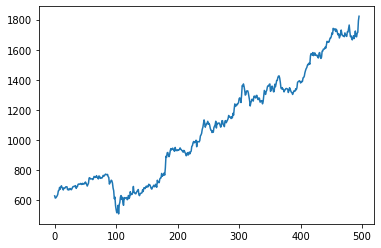

In [282]:
df['Adj Close'].plot()

In [283]:
#Set Target Variable
output_var = pd.DataFrame(df['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [284]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
0,0.092546,0.077282,0.083147,0.661285
1,0.107875,0.074579,0.096422,0.266690
2,0.105576,0.074031,0.099564,0.163462
4,0.108642,0.075010,0.108205,0.165279
5,0.115846,0.088837,0.115431,0.235135


In [285]:
feature_transform

,Open,High,Low,Volume
0,0.092546,0.077282,0.083147,0.661285
1,0.107875,0.074579,0.096422,0.266690
2,0.105576,0.074031,0.099564,0.163462
4,0.108642,0.075010,0.108205,0.165279
5,0.115846,0.088837,0.115431,0.235135
...,...,...,...,...
491,0.894999,0.886016,0.905502,0.060314
492,0.909523,0.905327,0.919681,0.056519
493,0.954014,0.960125,0.933938,0.198635
494,0.943284,0.972190,0.966773,0.128235


In [286]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [287]:
# Random Forest Regressor
model1 = RandomForestRegressor(n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model1.fit(X_train, y_train)
predict = model1.predict(X_test)
print(predict)
print(predict.shape)

[1699.61747267 1699.18987039 1699.08647049 1699.73236942 1699.73236942
 1699.18987039 1699.68826932 1699.52477126 1699.08647049 1699.08647049
 1699.18987039 1690.99218232 1681.56920091 1696.65417417 1699.61747267
 1699.61747267 1694.55558141 1687.78349317 1685.80109817 1690.40338911
 1699.61747267 1699.61747267 1699.18987039 1688.05038944 1699.61747267
 1699.61747267 1699.61747267 1699.18987039 1699.58897267 1694.17627867
 1673.8645072  1688.06389226 1668.08871518 1676.87703287 1679.30331095
 1690.09719279 1690.50498314 1699.61747267 1687.15579189 1679.71730853
 1696.55987338 1699.18987039 1699.18987039 1699.18987039]
(44,)


In [288]:
np.any(np.isnan(X_train))

False

In [308]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model1.score(X_train, y_train) * 100:.2f}% and Test Score : {model1.score(X_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 13.6901
Mean Squared Error: 302.3506
Root Mean Squared Error: 17.3882
(R^2) Score: 0.6701
Train Score : 99.98% and Test Score : 36.24% using Random Tree Regressor.
Accuracy: 98.06 %.


In [290]:
# SVR
model2 = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
model2.fit(X_train, y_train)
predict = model2.predict(X_test)
print(predict)
print(predict.shape)

[1697.00290511 1706.74063174 1728.27821003 1718.00670324 1730.3388715
 1727.1777554  1719.73465717 1722.68337729 1709.16299093 1696.33391518
 1693.73127465 1687.69591073 1672.09917094 1687.79716466 1704.63056924
 1711.36963471 1685.98275058 1680.47876183 1680.11727141 1681.71677408
 1692.58928726 1698.18564943 1692.95086675 1684.10023373 1696.1102393
 1714.34456805 1721.98800822 1754.75729127 1736.09566947 1688.40901939
 1668.76413952 1682.77283687 1663.35702933 1668.92405588 1673.7259133
 1684.14490854 1682.60123917 1704.06367598 1687.02865124 1669.93407421
 1689.38337939 1733.02809876 1751.78311936 1791.64677405]
(44,)


In [291]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model2.score(X_train, y_train) * 100:.2f}% and Test Score : {model2.score(X_test, y_test) * 100:.2f}% using SVR.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 12.3738
Mean Squared Error: 236.7926
Root Mean Squared Error: 15.3881
(R^2) Score: 0.7417
Train Score : 99.89% and Test Score : 74.17% using SVR.
Accuracy: 99.28 %.


In [292]:
#strictly minmax for ann and lstm
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
0,0.092546,0.077282,0.083147,0.661285
1,0.107875,0.074579,0.096422,0.266690
2,0.105576,0.074031,0.099564,0.163462
4,0.108642,0.075010,0.108205,0.165279
5,0.115846,0.088837,0.115431,0.235135


In [293]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [294]:
#Process the data for ANN and LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_1 = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [295]:
trainX.shape

(450, 4)

In [296]:
#Building the ANN model
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(32, input_shape = (1, trainX.shape[1]), activation = 'relu'))
# ann.add(tf.keras.layers.Dense(32))
ann.add(tf.keras.layers.Dense(16))
ann.add(tf.keras.layers.Dense(8))
ann.add(tf.keras.layers.Dense(1))

ann.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
              metrics = ['mae'])

In [297]:
history = ann.fit(X_train, y_train,batch_size= 8, epochs=100, verbose=1, shuffle=False)

Epoch 1/100
57/57 [==============================] - 2s 4ms/step - loss: 1017.3716 - mae: 1017.3716
Epoch 2/100
57/57 [==============================] - 0s 4ms/step - loss: 1007.3260 - mae: 1007.3260
Epoch 3/100
57/57 [==============================] - 0s 4ms/step - loss: 966.7608 - mae: 966.7608
Epoch 4/100
57/57 [==============================] - 0s 4ms/step - loss: 838.8031 - mae: 838.8031
Epoch 5/100
57/57 [==============================] - 0s 4ms/step - loss: 516.7022 - mae: 516.7022
Epoch 6/100
57/57 [==============================] - 0s 4ms/step - loss: 57.5584 - mae: 57.5584
Epoch 7/100
57/57 [==============================] - 0s 4ms/step - loss: 30.5196 - mae: 30.5196
Epoch 8/100
57/57 [==============================] - 0s 4ms/step - loss: 29.6006 - mae: 29.6006
Epoch 9/100
57/57 [==============================] - 0s 4ms/step - loss: 27.8455 - mae: 27.8455
Epoch 10/100
57/57 [==============================] - 0s 4ms/step - loss: 26.6963 - mae: 26.6963
Epoch 11/100
57/57 [=====

57/57 [==============================] - 0s 4ms/step - loss: 22.2367 - mae: 22.2367
Epoch 86/100
57/57 [==============================] - 0s 4ms/step - loss: 22.2656 - mae: 22.2656
Epoch 87/100
57/57 [==============================] - 0s 4ms/step - loss: 22.3331 - mae: 22.3331
Epoch 88/100
57/57 [==============================] - 0s 4ms/step - loss: 22.3129 - mae: 22.3129
Epoch 89/100
57/57 [==============================] - 0s 4ms/step - loss: 22.2371 - mae: 22.2371
Epoch 90/100
57/57 [==============================] - 0s 4ms/step - loss: 22.2517 - mae: 22.2517
Epoch 91/100
57/57 [==============================] - 0s 4ms/step - loss: 22.2758 - mae: 22.2758
Epoch 92/100
57/57 [==============================] - 0s 4ms/step - loss: 22.2719 - mae: 22.2719
Epoch 93/100
57/57 [==============================] - 0s 4ms/step - loss: 22.2946 - mae: 22.2946
Epoch 94/100
57/57 [==============================] - 0s 4ms/step - loss: 22.3395 - mae: 22.3395
Epoch 95/100
57/57 [=======================

In [298]:
predict = ann.predict(X_test_1)
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, np.squeeze(predict)), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, np.squeeze(predict)), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, np.squeeze(predict))), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, np.squeeze(predict)), 4))
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

2/2 [==============================] - 0s 4ms/step
Mean Absolute Error: 17.4588
Mean Squared Error: 440.5705
Root Mean Squared Error: 20.9898
(R^2) Score: 0.5193
Accuracy: 97.98 %.


In [299]:
#Building the LSTM Model
lstm = tf.keras.models.Sequential()
lstm.add(tf.keras.layers.LSTM(32, input_shape = (1, trainX.shape[1]), activation = 'relu', return_sequences= False))
# lstm.add(tf.keras.layers.LSTM(32, activation = 'relu', return_sequences=False))
# lstm.add(tf.keras.layers.Dense(32))
lstm.add(tf.keras.layers.Dense(16))
lstm.add(tf.keras.layers.Dense(8))
lstm.add(tf.keras.layers.Dense(1))

lstm.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ['mae'])

In [300]:
history2 = lstm.fit(X_train, y_train,batch_size= 32, epochs=300, verbose=1, shuffle=False)

Epoch 1/300
15/15 [==============================] - 3s 5ms/step - loss: 1019.4303 - mae: 1019.4303
Epoch 2/300
15/15 [==============================] - 0s 5ms/step - loss: 1019.2495 - mae: 1019.2495
Epoch 3/300
15/15 [==============================] - 0s 5ms/step - loss: 1019.0062 - mae: 1019.0062
Epoch 4/300
15/15 [==============================] - 0s 5ms/step - loss: 1018.6216 - mae: 1018.6216
Epoch 5/300
15/15 [==============================] - 0s 5ms/step - loss: 1017.9933 - mae: 1017.9933
Epoch 6/300
15/15 [==============================] - 0s 5ms/step - loss: 1016.9708 - mae: 1016.9708
Epoch 7/300
15/15 [==============================] - 0s 5ms/step - loss: 1015.3401 - mae: 1015.3401
Epoch 8/300
15/15 [==============================] - 0s 5ms/step - loss: 1012.8065 - mae: 1012.8065
Epoch 9/300
15/15 [==============================] - 0s 5ms/step - loss: 1008.9598 - mae: 1008.9598
Epoch 10/300
15/15 [==============================] - 0s 5ms/step - loss: 1003.2590 - mae: 1003.2590

15/15 [==============================] - 0s 5ms/step - loss: 18.8303 - mae: 18.8303
Epoch 85/300
15/15 [==============================] - 0s 5ms/step - loss: 18.2623 - mae: 18.2623
Epoch 86/300
15/15 [==============================] - 0s 5ms/step - loss: 18.0552 - mae: 18.0552
Epoch 87/300
15/15 [==============================] - 0s 5ms/step - loss: 17.7616 - mae: 17.7616
Epoch 88/300
15/15 [==============================] - 0s 5ms/step - loss: 17.4566 - mae: 17.4566
Epoch 89/300
15/15 [==============================] - 0s 5ms/step - loss: 17.3139 - mae: 17.3139
Epoch 90/300
15/15 [==============================] - 0s 5ms/step - loss: 16.9550 - mae: 16.9550
Epoch 91/300
15/15 [==============================] - 0s 5ms/step - loss: 16.7650 - mae: 16.7650
Epoch 92/300
15/15 [==============================] - 0s 5ms/step - loss: 16.4708 - mae: 16.4708
Epoch 93/300
15/15 [==============================] - 0s 5ms/step - loss: 16.2404 - mae: 16.2404
Epoch 94/300
15/15 [=======================

15/15 [==============================] - 0s 5ms/step - loss: 11.2607 - mae: 11.2607
Epoch 168/300
15/15 [==============================] - 0s 5ms/step - loss: 12.0637 - mae: 12.0637
Epoch 169/300
15/15 [==============================] - 0s 5ms/step - loss: 11.1485 - mae: 11.1485
Epoch 170/300
15/15 [==============================] - 0s 5ms/step - loss: 11.9234 - mae: 11.9234
Epoch 171/300
15/15 [==============================] - 0s 5ms/step - loss: 11.1510 - mae: 11.1510
Epoch 172/300
15/15 [==============================] - 0s 5ms/step - loss: 11.7798 - mae: 11.7798
Epoch 173/300
15/15 [==============================] - 0s 5ms/step - loss: 11.1944 - mae: 11.1944
Epoch 174/300
15/15 [==============================] - 0s 5ms/step - loss: 11.7782 - mae: 11.7782
Epoch 175/300
15/15 [==============================] - 0s 5ms/step - loss: 11.0480 - mae: 11.0480
Epoch 176/300
15/15 [==============================] - 0s 5ms/step - loss: 11.7384 - mae: 11.7384
Epoch 177/300
15/15 [=============

15/15 [==============================] - 0s 5ms/step - loss: 9.7956 - mae: 9.7956
Epoch 251/300
15/15 [==============================] - 0s 5ms/step - loss: 9.6928 - mae: 9.6928
Epoch 252/300
15/15 [==============================] - 0s 5ms/step - loss: 9.8032 - mae: 9.8032
Epoch 253/300
15/15 [==============================] - 0s 5ms/step - loss: 9.6060 - mae: 9.6060
Epoch 254/300
15/15 [==============================] - 0s 5ms/step - loss: 9.6644 - mae: 9.6644
Epoch 255/300
15/15 [==============================] - 0s 5ms/step - loss: 9.6966 - mae: 9.6966
Epoch 256/300
15/15 [==============================] - 0s 5ms/step - loss: 9.5276 - mae: 9.5276
Epoch 257/300
15/15 [==============================] - 0s 5ms/step - loss: 9.6654 - mae: 9.6654
Epoch 258/300
15/15 [==============================] - 0s 5ms/step - loss: 9.4530 - mae: 9.4530
Epoch 259/300
15/15 [==============================] - 0s 5ms/step - loss: 9.7196 - mae: 9.7196
Epoch 260/300
15/15 [==============================] -

In [301]:
predict = lstm.predict(X_test_1)
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

2/2 [==============================] - 0s 5ms/step
Mean Absolute Error: 13.6901
Mean Squared Error: 302.3506
Root Mean Squared Error: 17.3882
(R^2) Score: 0.6701
Accuracy: 98.06 %.


2/2 [==============================] - 0s 5ms/step


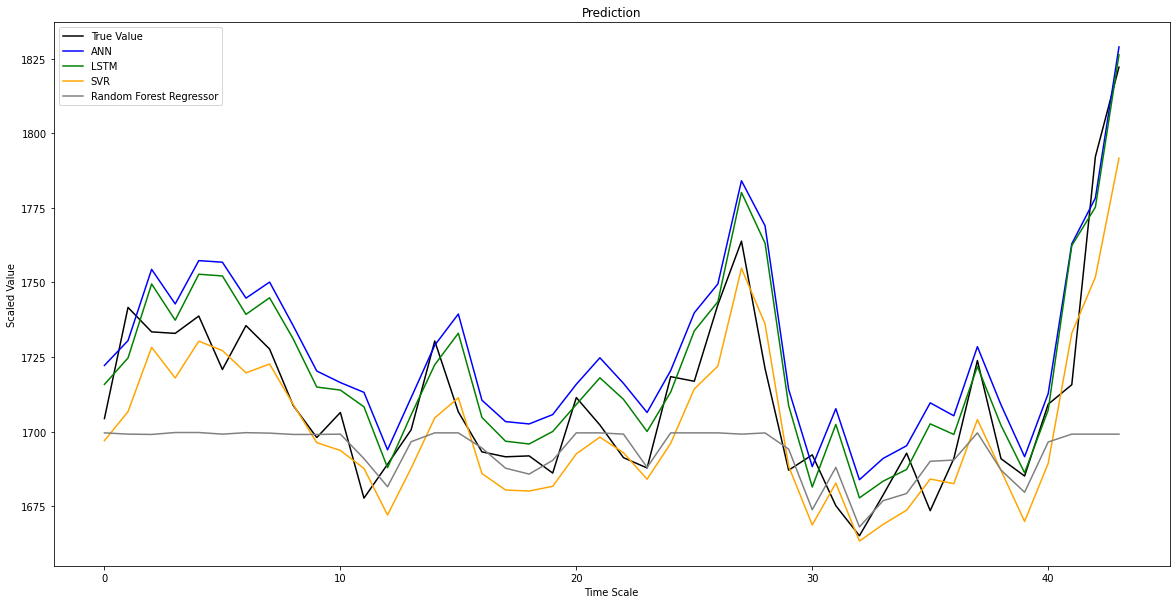

In [302]:
y_pred= lstm.predict(X_test_1)
y_pred_2= ann.predict(X_test_1)
predict_SVR = model2.predict(X_test)
predict_RF = model1.predict(X_test)
plt.figure(figsize = (20, 10))
plt.plot(y_test, label='True Value', c = 'black')
plt.plot(np.squeeze(y_pred_2), label='ANN', c = 'blue')
plt.plot(y_pred, label='LSTM', c = 'green')
plt.plot(predict_SVR, label='SVR', c = 'orange' )
plt.plot(predict_RF, label='Random Forest Regressor', c = 'grey')
plt.title('Prediction')
plt.xlabel('Time Scale')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()

In [303]:
# y_pred= lstm.predict(X_test_1)
# y_pred_2= ann.predict(X_test_1)
# predict_SVR = model2.predict(X_test)
# predict_RF = model1.predict(X_test)

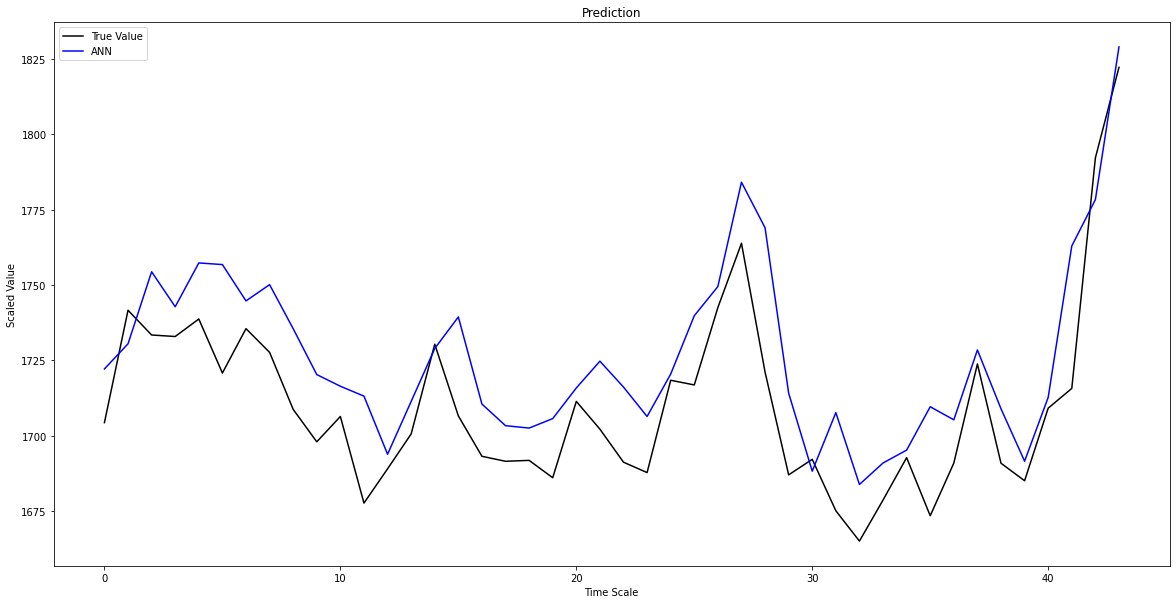

In [304]:
plt.figure(figsize = (20, 10))
plt.plot(y_test, label='True Value', c = 'black')
plt.plot(np.squeeze(y_pred_2), label='ANN', c = 'blue')
# plt.plot(y_pred, label='LSTM', c = 'green')
# plt.plot(predict_SVR, label='SVR', c = 'orange' )
# plt.plot(predict_RF, label='Random Forest Regressor', c = 'grey')
plt.title('Prediction')
plt.xlabel('Time Scale')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()

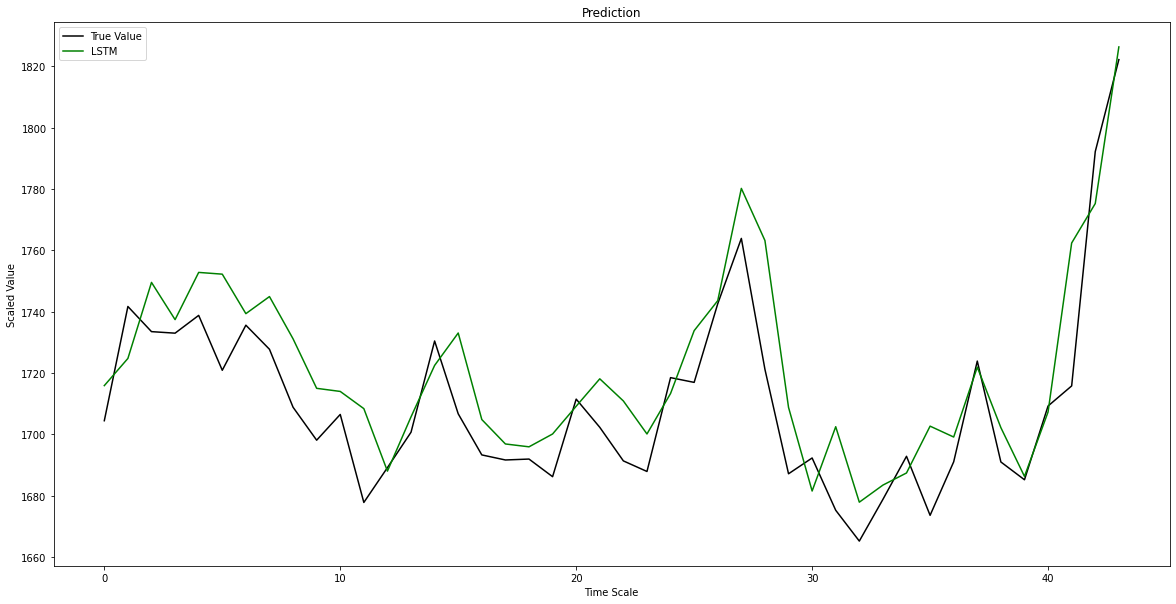

In [305]:
plt.figure(figsize = (20, 10))
plt.plot(y_test, label='True Value', c = 'black')
# plt.plot(np.squeeze(y_pred_2), label='ANN', c = 'blue')
plt.plot(y_pred, label='LSTM', c = 'green')
# plt.plot(predict_SVR, label='SVR', c = 'orange' )
# plt.plot(predict_RF, label='Random Forest Regressor', c = 'grey')
plt.title('Prediction')
plt.xlabel('Time Scale')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()

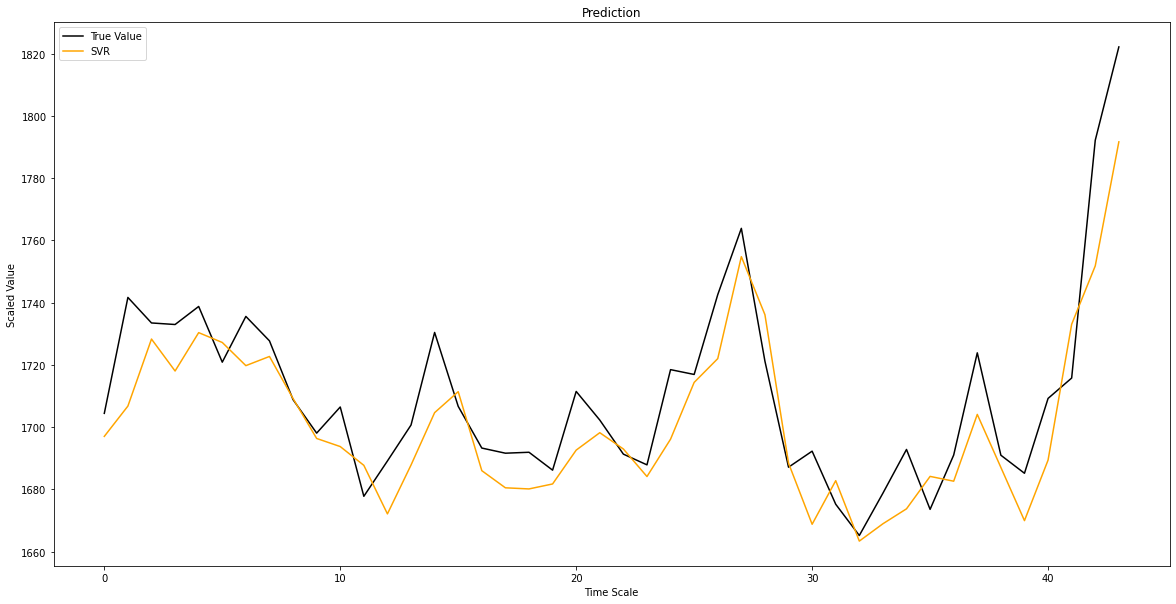

In [306]:
plt.figure(figsize = (20, 10))
plt.plot(y_test, label='True Value', c = 'black')
# plt.plot(np.squeeze(y_pred_2), label='ANN', c = 'blue')
# plt.plot(y_pred, label='LSTM', c = 'green')
plt.plot(predict_SVR, label='SVR', c = 'orange' )
# plt.plot(predict_RF, label='Random Forest Regressor', c = 'grey')
plt.title('Prediction')
plt.xlabel('Time Scale')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()

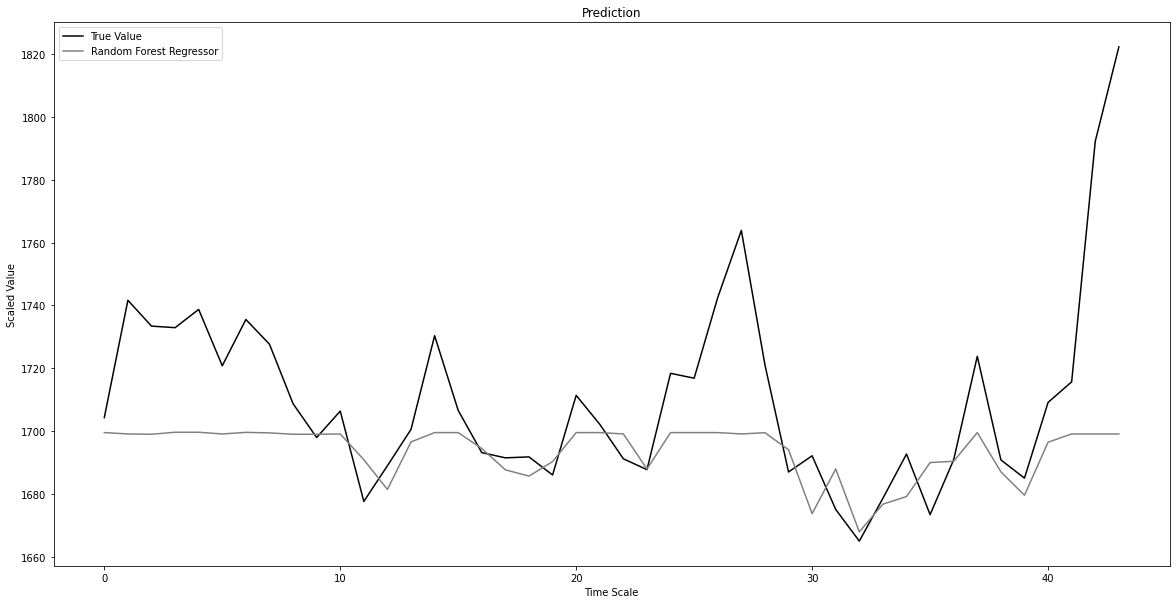

In [307]:
plt.figure(figsize = (20, 10))
plt.plot(y_test, label='True Value', c = 'black')
# plt.plot(np.squeeze(y_pred_2), label='ANN', c = 'blue')
# plt.plot(y_pred, label='LSTM', c = 'green')
# plt.plot(predict_SVR, label='SVR', c = 'orange' )
plt.plot(predict_RF, label='Random Forest Regressor', c = 'grey')
plt.title('Prediction')
plt.xlabel('Time Scale')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()